In [1]:
import platform
import os

from street_signs_identify.utils.raw_image_loader import RawImageLoader

In [2]:
if platform.system() == "Linux":
    data_path = "./dataset/raw_data/"
    # annotation_file = "2Penghu_ori_all.json"
    annotation_file = "3Taoyuan_ori_all.json"
    output_csv = os.path.join(data_path, "3Taoyuan_ori_all.csv")
    encoding = None
else:
    data_path = "./dataset/raw_data/"
    annotation_file = "2Penghu_ori_all.json"
    output_csv = os.path.join(data_path, "2Penghu_ori_all.csv")
    encoding = 'big5'


# annotation_file = "3Taoyuan_ori_all.json"

image_loader = RawImageLoader(data_path, annotation_file)


In [3]:
# drop ratio < 1.5
drop_index = image_loader._info["ratio"] < 1.5
image_loader._info = image_loader._info.loc[~drop_index]
image_loader._info

,filename,size,polygon,category,word,no_star,ratio,x0,y0,x1,y1
0,220707_023525413_Camera_3.jpg,267955,"POLYGON ((101 932, 87 1002, 269 1042, 280 986,...",1,木墊貨專區\nSkid Cargo Center,True,1.754545,87,932,280,1042
2,220707_023525413_Camera_3.jpg,267955,"POLYGON ((74 1068, 261 1100, 270 1043, 88 1003...",1,None,NaN,2.020619,74,1003,270,1100
3,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2191 772, 2198 852, 2450 827, 2450 7...",3,南崁.竹園\nNankan.Zhuwei,True,2.376147,2191,743,2450,852
4,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2203 928, 2198 850, 2450 825, 2451 9...",1,第一航廈\nTerminal 1,True,2.456311,2198,825,2451,928
5,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2209 1004, 2203 927, 2450 909, 2451 ...",1,二航入境\nT2 Arrivals,True,2.610526,2203,909,2451,1004
...,...,...,...,...,...,...,...,...,...,...,...
186,220707_053755977_Camera_1.jpg,316398,"POLYGON ((1825 920, 1827 961, 1943 957, 1941 9...",1,出境大廳\n*,False,2.622222,1825,916,1943,961
187,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2065 917, 2067 954, 1944 956, 1943 9...",1,1號停車場,True,3.100000,1943,916,2067,956
192,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2246 963, 2248 1005, 2451 990, 2451 ...",1,出境大廳\nDeparture hall,True,3.253968,2246,942,2451,1005
193,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2251 1050, 2451 1040, 2451 991, 2247...",1,1號停車場\nCar park 1,True,3.457627,2247,991,2451,1050


In [4]:
# drop star
drop_index = image_loader._info["no_star"] == False
image_loader._info = image_loader._info.loc[~drop_index]
image_loader._info

,filename,size,polygon,category,word,no_star,ratio,x0,y0,x1,y1
0,220707_023525413_Camera_3.jpg,267955,"POLYGON ((101 932, 87 1002, 269 1042, 280 986,...",1,木墊貨專區\nSkid Cargo Center,True,1.754545,87,932,280,1042
2,220707_023525413_Camera_3.jpg,267955,"POLYGON ((74 1068, 261 1100, 270 1043, 88 1003...",1,None,NaN,2.020619,74,1003,270,1100
3,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2191 772, 2198 852, 2450 827, 2450 7...",3,南崁.竹園\nNankan.Zhuwei,True,2.376147,2191,743,2450,852
4,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2203 928, 2198 850, 2450 825, 2451 9...",1,第一航廈\nTerminal 1,True,2.456311,2198,825,2451,928
5,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2209 1004, 2203 927, 2450 909, 2451 ...",1,二航入境\nT2 Arrivals,True,2.610526,2203,909,2451,1004
...,...,...,...,...,...,...,...,...,...,...,...
182,220707_060159380_Camera_1.jpg,289277,"POLYGON ((2129 819, 2138 928, 2427 891, 2413 7...",6,2號停車場\nCar Park 2,True,1.850932,2129,767,2427,928
187,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2065 917, 2067 954, 1944 956, 1943 9...",1,1號停車場,True,3.100000,1943,916,2067,956
192,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2246 963, 2248 1005, 2451 990, 2451 ...",1,出境大廳\nDeparture hall,True,3.253968,2246,942,2451,1005
193,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2251 1050, 2451 1040, 2451 991, 2247...",1,1號停車場\nCar park 1,True,3.457627,2247,991,2451,1050


In [5]:
image_loader._info.to_csv(output_csv, index=False, encoding=encoding)
image_loader._info

,filename,size,polygon,category,word,no_star,ratio,x0,y0,x1,y1
0,220707_023525413_Camera_3.jpg,267955,"POLYGON ((101 932, 87 1002, 269 1042, 280 986,...",1,木墊貨專區\nSkid Cargo Center,True,1.754545,87,932,280,1042
2,220707_023525413_Camera_3.jpg,267955,"POLYGON ((74 1068, 261 1100, 270 1043, 88 1003...",1,None,NaN,2.020619,74,1003,270,1100
3,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2191 772, 2198 852, 2450 827, 2450 7...",3,南崁.竹園\nNankan.Zhuwei,True,2.376147,2191,743,2450,852
4,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2203 928, 2198 850, 2450 825, 2451 9...",1,第一航廈\nTerminal 1,True,2.456311,2198,825,2451,928
5,220707_060950255_Camera_1.jpg,269094,"POLYGON ((2209 1004, 2203 927, 2450 909, 2451 ...",1,二航入境\nT2 Arrivals,True,2.610526,2203,909,2451,1004
...,...,...,...,...,...,...,...,...,...,...,...
182,220707_060159380_Camera_1.jpg,289277,"POLYGON ((2129 819, 2138 928, 2427 891, 2413 7...",6,2號停車場\nCar Park 2,True,1.850932,2129,767,2427,928
187,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2065 917, 2067 954, 1944 956, 1943 9...",1,1號停車場,True,3.100000,1943,916,2067,956
192,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2246 963, 2248 1005, 2451 990, 2451 ...",1,出境大廳\nDeparture hall,True,3.253968,2246,942,2451,1005
193,220707_053755977_Camera_1.jpg,316398,"POLYGON ((2251 1050, 2451 1040, 2451 991, 2247...",1,1號停車場\nCar park 1,True,3.457627,2247,991,2451,1050


In [6]:
import matplotlib.pyplot as plt

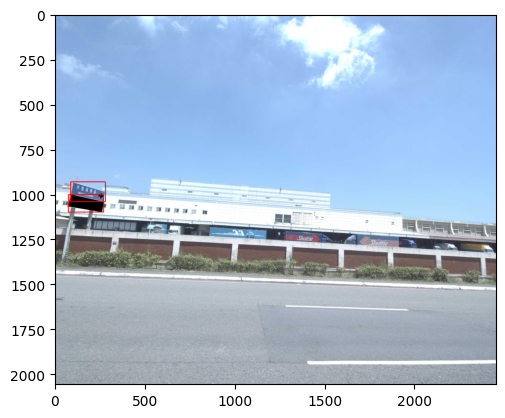

In [7]:
for img in image_loader:
    img = img.draw_all_box()
    plt.imshow(img)
    break